# Decision Tree Model for a Heart Disease Predictor

A model to predict whether a patient has a heart disease or not using the Decision Trees algorithm/Classifer.
- Name: Mark Kasule
- Date: 09/16/2024
- Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Importing Libraries

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Read Dataset

In [44]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data Inspection

In [45]:
# Number of rows and columns
df.shape

(5110, 12)

In [46]:
# Check for each column's data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [47]:
# Check for missing values
df.isnull().sum()  

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Drop/Delete Columns that aren't Needed

In [48]:
# Remove column 'id'
df = df.drop(['id'], axis=1)
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory Data Analysis

### Summary of all Numerical data

In [49]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Summary of all Categorical Data

In [50]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Correlation Analysis

Correlation of specific columns

In [51]:
specific_columns = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']]
# Print the first 5 rows
specific_columns.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,67.0,0,1,228.69,1
1,61.0,0,0,202.21,1
2,80.0,0,1,105.92,1
3,49.0,0,0,171.23,1
4,79.0,1,0,174.12,1


Create a Correlation matrix

In [52]:
specific_columns.corr()

,age,hypertension,heart_disease,avg_glucose_level,stroke
age,1.000000,0.276398,0.263796,0.238171,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.131945
stroke,0.245257,0.127904,0.134914,0.131945,1.000000


In [53]:
# Display in a styled table
specific_columns.corr().style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,avg_glucose_level,stroke
age,1.000000,0.276398,0.263796,0.238171,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.131945
stroke,0.245257,0.127904,0.134914,0.131945,1.000000


[]

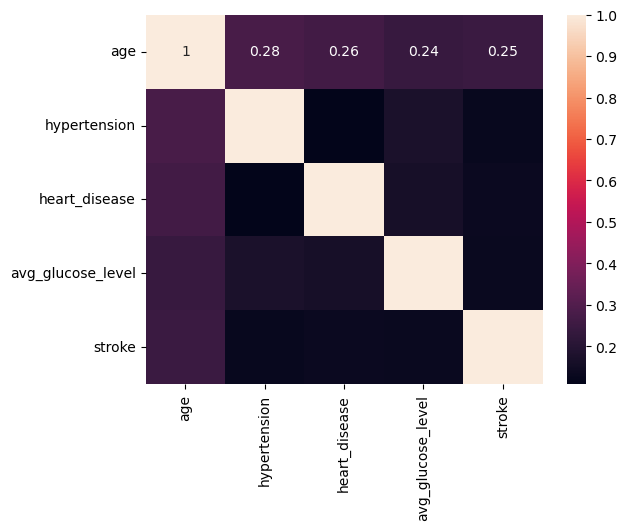

In [54]:
# Display in a styled heatmap
sns.heatmap(specific_columns.corr(), annot=True)
plt.plot()

## Data Visualizations

#### Categorical Data

Count of all gender

In [55]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Visualization

[]

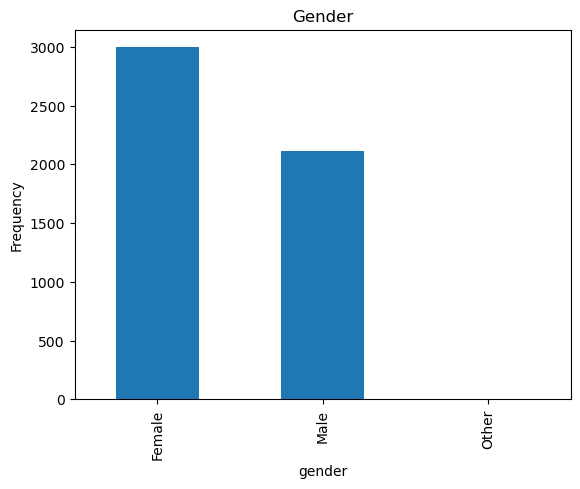

In [56]:
df["gender"].value_counts().plot(kind="bar",ylabel="Frequency", title="Gender")
plt.plot()

Work Type Statistics

In [57]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Visualization

[]

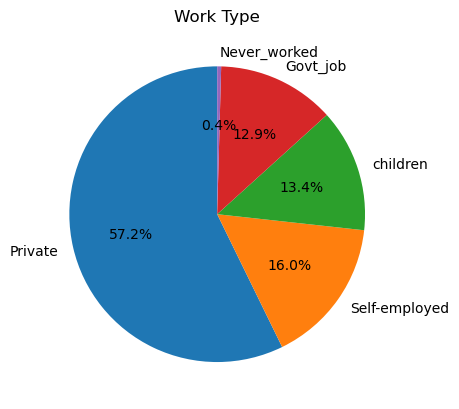

In [58]:
df["work_type"].value_counts().plot(kind="pie", title="Work Type", ylabel="", autopct="%1.1f%%", startangle=90)
plt.plot()

In [59]:
# How many are married
df["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

[]

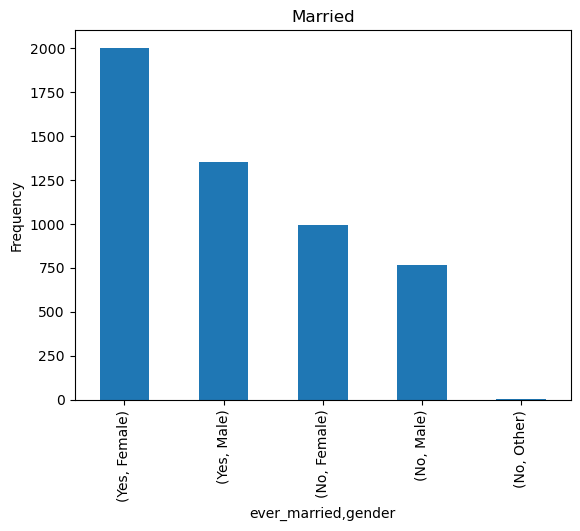

In [60]:
df[["ever_married", "gender"]].value_counts().plot(kind="bar", ylabel="Frequency", title="Married")
plt.plot()

### Numerical Data

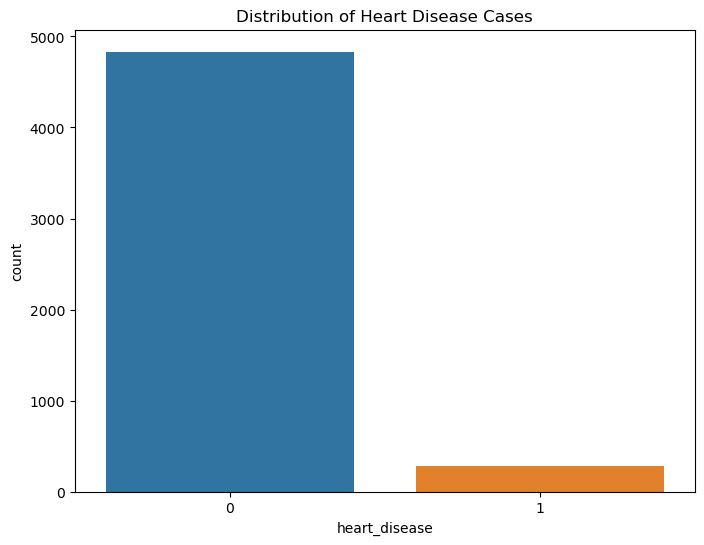

In [61]:
# Heart Disease
plt.figure(figsize=(8,6))
sns.countplot(x='heart_disease', data=df)
plt.title('Distribution of Heart Disease Cases')
plt.show()

[]

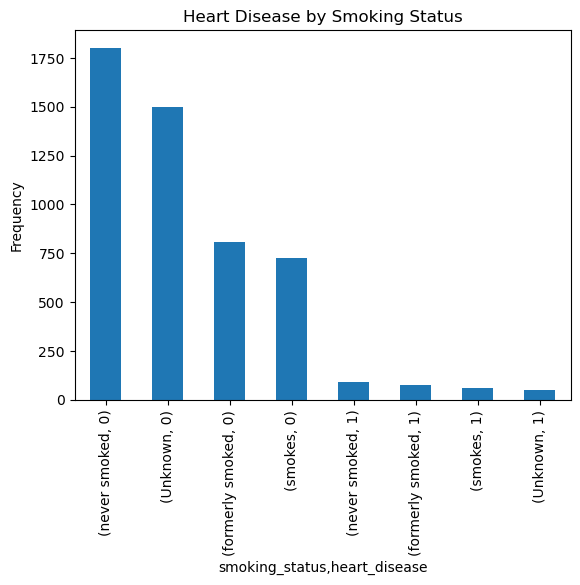

In [62]:
# Heart Disease by Smoking Status
df[["smoking_status", "heart_disease"]].value_counts().plot(kind="bar", title="Heart Disease by Smoking Status", ylabel="Frequency")
plt.plot()


[]

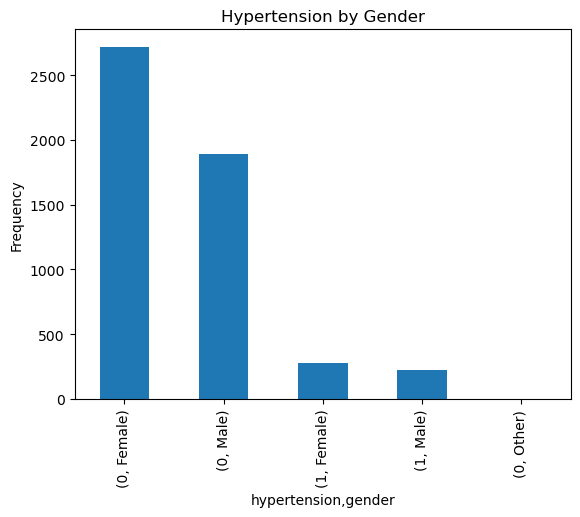

In [63]:
# Display Hypertension Results
df[["hypertension", "gender"]].value_counts().plot(kind="bar", title="Hypertension by Gender", ylabel="Frequency")
plt.plot()

[]

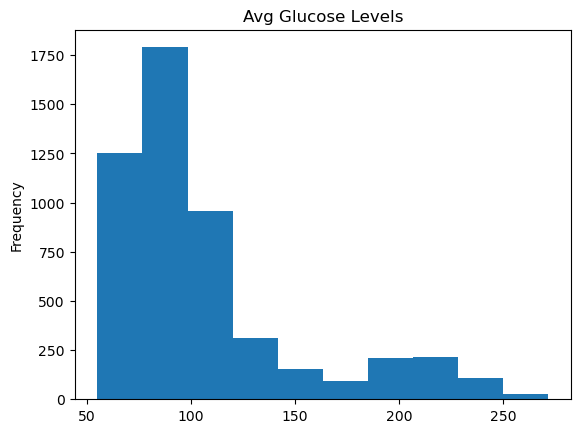

In [64]:
# Avg Glucose Levels
df["avg_glucose_level"].plot(kind="hist", title="Avg Glucose Levels", ylabel="Frequency")
plt.plot()

### Checking for Outliers

Body Mass Index - BMI

[]

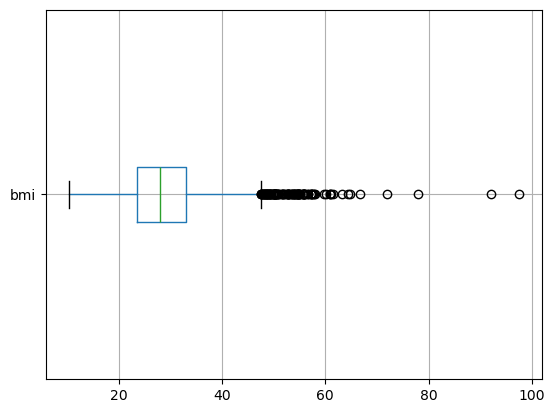

In [65]:
# Whiskers plot
# Horizontal representation of BMI - Body Mass Index
df.boxplot(column="bmi", vert=False)
plt.plot()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


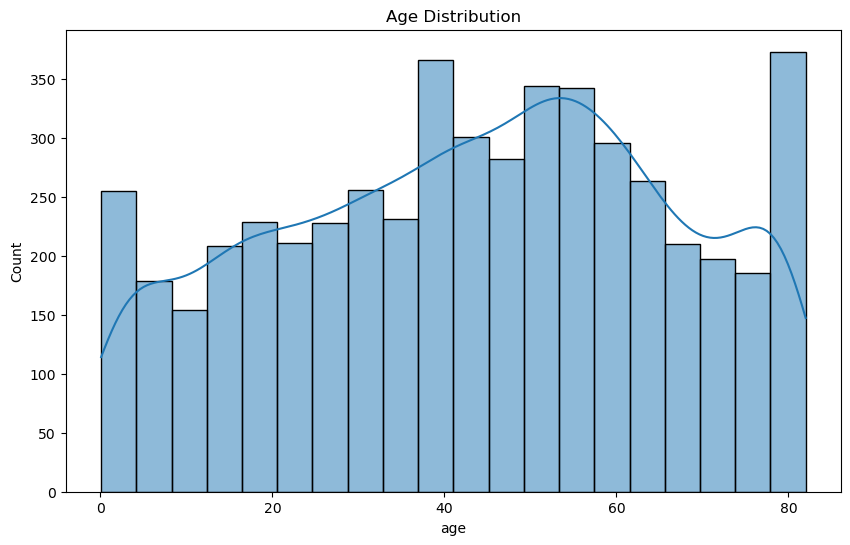

In [66]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', kde=True)
plt.title('Age Distribution')
plt.show()


[]

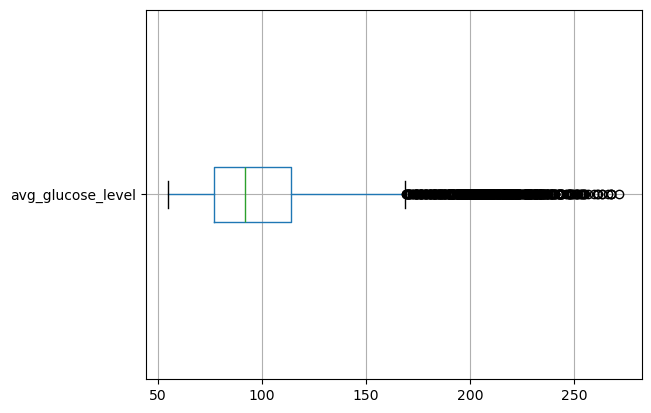

In [67]:
# Whiskers plot
# Horizontal representation of Glucose Levels
df.boxplot(column="avg_glucose_level", vert=False)
plt.plot()

## Data Processing

Replace any missing values in BMI

In [68]:
# Display head of BMI
df["bmi"].head()

0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

In [69]:
# Check for missing values in BMI
df['bmi'].isnull().sum()

201

In [70]:
# Replace all missing values in BMI with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['bmi'].isnull().sum()

0

In [71]:
# Confirm if all NAN values have been replaced
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [72]:
# Check for data types
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Preparation for the Model

In [73]:
# Identify features and target
X = df.drop('heart_disease', axis=1) # Assign all column as features except heart disease
y = df['heart_disease'] # Assign heart disease as target

print(X.head())
print(y.value_counts(normalize=True))

   gender   age  hypertension ever_married      work_type Residence_type  \
0    Male  67.0             0          Yes        Private          Urban   
1  Female  61.0             0          Yes  Self-employed          Rural   
2    Male  80.0             0          Yes        Private          Rural   
3  Female  49.0             0          Yes        Private          Urban   
4  Female  79.0             1          Yes  Self-employed          Rural   

   avg_glucose_level   bmi   smoking_status  stroke  
0             228.69  36.6  formerly smoked       1  
1             202.21  28.1     never smoked       1  
2             105.92  32.5     never smoked       1  
3             171.23  34.4           smokes       1  
4             174.12  24.0     never smoked       1  
heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64


### Split the Data for Training

In [74]:
### SPlit Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Label and Encode all categorical variables
- [Source](https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/#)

In [75]:
# Define categorical features to be encoded
# Define categorical and numerical features
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder


categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'avg_glucose_level', 'bmi', 'stroke']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

### Build and Create Decision Tree Model

#### Create Model Pipeline

In [76]:
# Create pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5))
])

# Fit the pipeline
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'avg_glucose_level', 'bmi',
                                                   'stroke']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=5,
                                        random_state=100))])

### Evaluate the Model

#### Make Predictions

In [77]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Check Model Accuracy

In [78]:
from sklearn.metrics import accuracy_score


accuracy = model.score(X_test, y_test) * 100
print("Decision Tree Classifier Accuracy Score:", round(accuracy, 2))

Decision Tree Classifier Accuracy Score: 94.52


#### Classification Report
#### Important Metrics - accuracy, precision, recall and F1-score
Understanding reports - https://www.statology.org/sklearn-classification-report/

In [79]:
# Print classification report
from sklearn.metrics import classification_report, confusion_matrix

# Create classification report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1449
           1       0.00      0.00      0.00        84

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533

[[1449    0]
 [  84    0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix

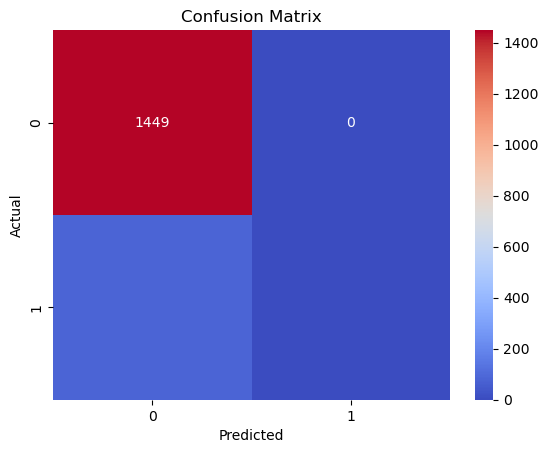

In [80]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
from collections import Counter
Counter(y_train)
Counter(y_test)

Counter({0: 1449, 1: 84})

### ROC Score

In [82]:
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_pred_probability = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_probability)

print(f"ROC AUC Score: {roc_auc:.3f}")

ROC AUC Score: 0.832


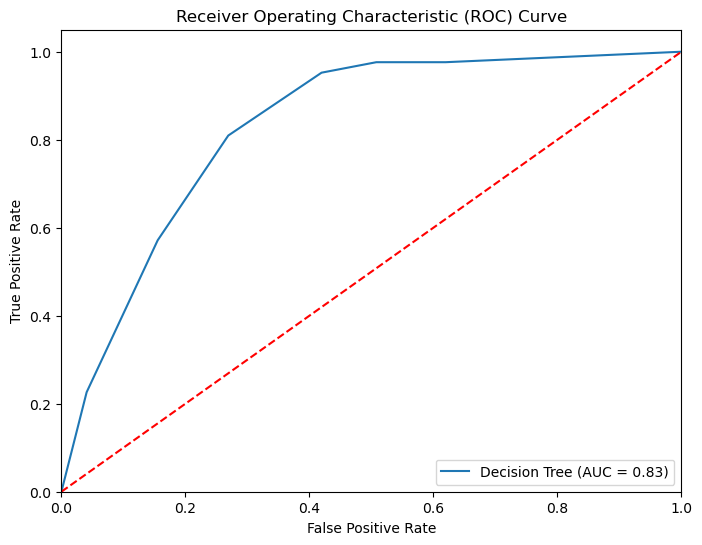

ROC AUC Score: 0.832


In [83]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC score
dt_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('DecisionTree_ROC')
plt.show()

print(f"ROC AUC Score: {dt_roc_auc:.3f}")

### Function to make predictions

In [86]:
def predict_heart_disease(sample):
    # Convert sample to DataFrame if it's a dictionary
    if isinstance(sample, dict):
        sample = pd.DataFrame([sample])
    
    # Make prediction using the pipeline
    prediction = model.predict(sample)[0]
    
    return "Heart Disease" if prediction == 1 else "No Heart Disease"


### Test Patient Data Predictions

In [89]:
X.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [87]:
# Patient Data
sample = {
    'gender': 'Male',
    'age': 80,
    'hypertension': 0,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 100,
    'bmi': 309,
    'smoking_status': 'smokes',
    'stroke':1
}
result = predict_heart_disease(sample)
print(f"\nPrediction for sample: {result}")


Prediction for sample: No Heart Disease
